In [2]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [5]:
wine.data.shape

(178, 13)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data, wine.target,test_size=0.3)

In [7]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

In [9]:
print("Sigle Tree:{}".format(score_c)
      ,"Random Forest:{}".format(score_r)
     )

Sigle Tree:0.8703703703703703 Random Forest:0.9814814814814815


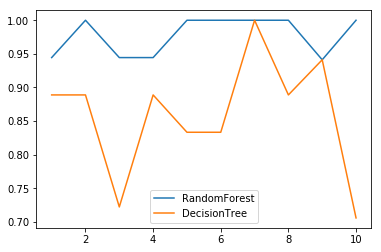

In [10]:
# 交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc, wine.data, wine.target, cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="RandomForest")
plt.plot(range(1,11),clf_s,label="DecisionTree")
plt.legend()
plt.show()

RandomForest:
0.9552287581699346
DecisionTree:
0.8594771241830067


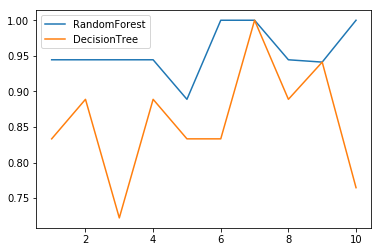

In [15]:
label = "RandomForest" 
for model in [RandomForestClassifier(n_estimators=25),DecisionTreeClassifier()]: 
    score = cross_val_score(model,wine.data,wine.target,cv=10) 
    print("{}:".format(label)),print(score.mean()) 
    plt.plot(range(1,11),score,label = label) 
    plt.legend() 
    label = "DecisionTree"
plt.show()

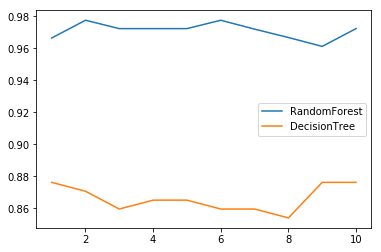

In [12]:
rfc_l = []
clf_l = []

for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
    
plt.plot(range(1,11),rfc_l,label="RandomForest")
plt.plot(range(1,11),clf_l,label="DecisionTree")
plt.legend()
plt.show()

0.9888888888888889 22


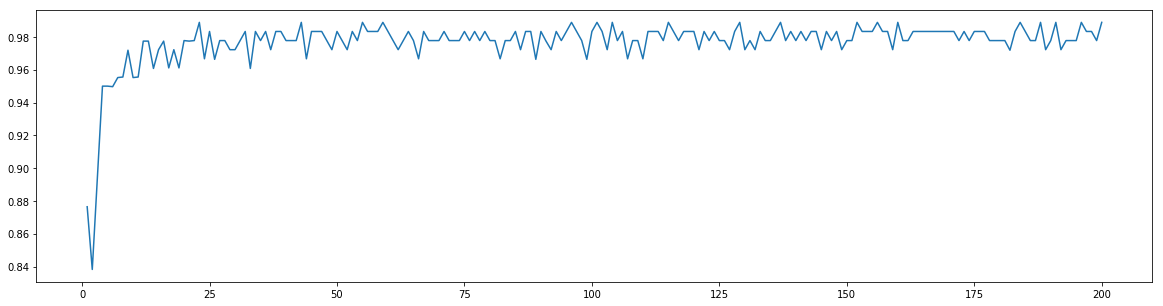

In [13]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)

print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [16]:
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [21]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain,Ytrain)

#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state

for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [25]:
# 无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [19]:
# 重要属性oob_score_
rfc.oob_score_

0.9719101123595506

In [20]:
rfc.apply(Xtest) # 每个样本在每个树中的节点的索引

array([[27,  9,  6, ...,  7, 12, 13],
       [ 8, 12, 18, ..., 18,  7,  8],
       [22, 18, 17, ..., 20, 24, 24],
       ...,
       [27, 17,  7, ..., 20, 12, 21],
       [22, 18, 17, ..., 20, 24, 24],
       [14,  9, 14, ...,  7, 18, 15]], dtype=int64)

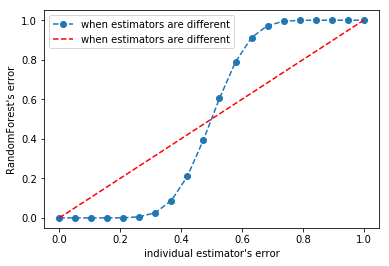

In [28]:
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)

plt.plot(x,y,"o--",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="when estimators are different")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.savefig("bagging_condition",dpi=300)
plt.show()

In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor
                ,boston.data
                ,boston.target
                ,cv = 10
                ,scoring = "neg_mean_squared_error"
               )

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [31]:
# sklearn当中的模型评估指标列表
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## 3.2 实例：用随机森林回归填补缺失值

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer # 填补缺失值的类
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = load_boston()

In [3]:
dataset.data.shape

(506, 13)

In [4]:
# 总共506*13=6578个数据
X_full,y_full = dataset.data,dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [5]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))# np.floor向下取整，返回.0格式的浮点数

In [6]:
# randint(下限，上限，n)在上下限之间取出n个整数
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [7]:
missing_features

array([12,  5,  0, ..., 11,  0,  2])

In [8]:
X_missing = X_full.copy()
y_missing = y_full.copy()

# 可以直接通过列表形式赋值
X_missing[missing_samples,missing_features] = np.nan

#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如 pandas来得好用
X_missing = pd.DataFrame(X_missing)

In [9]:
# 使用均值进行填补
# SimpleImputer是填补缺失值的类，strategy为填补数据的类型
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean') # 实例化
X_missing_mean = imp_mean.fit_transform(X_missing) # 训练fit+导出predict>>>特殊的接口fit_transform

In [10]:
# 使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

In [11]:
# 查看是否还有空值，无空值，证明完全填补
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

#### 使用随机森林进行填补

In [40]:
X_missing_reg = X_missing.copy()

In [41]:
# 找出数据集中，缺失值从小到大排列的特征的顺序，且得到这些特征的索引
# argsort返回从小到大排序的顺序所对应的索引
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [42]:
np.argsort(X_missing_reg.isnull().sum(axis=0)).values

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [43]:
for i in sortindex:
    # 构建我们的新特征矩阵（没有被选中去填充的特征+原始的标签）和新标签（被选中去填充的特征）
    df = X_missing_reg
    # 新标签
    fillc = df.iloc[:,i]
    # 新特征矩阵
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    # 在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0).fit_transform(df)
    # 找出我们的训练集和测试集
    # 现在标签中存在的非空值
    Ytrain = fillc[fillc.notnull()]
    # 现在标签中的空值
    # 不需要Ytest的值，要的是Ytest的索引
    Ytest = fillc[fillc.isnull()]
    # 在新特征矩阵上，被选出来的要填充的非空值对应的记录
    Xtrain = df_0[Ytrain.index,:]
    # 新特征矩阵上，被选出来的要填充的那个特征的空值对应的记录
    Xtest = df_0[Ytest.index]
    
    # 用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)# 实例化
    rfc = rfc.fit(Xtrain,Ytrain)# 训练
    # 用predict接口将Xtest导入，得到预测结果作为填补空值的值
    Ypredict = rfc.predict(Xtest)
    
    # 将填补好的特征返回原始特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [45]:
from sklearn.model_selection import cross_val_score
# 对所有数据进行建模，取得MSE结果
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]

mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error').mean()
    mse.append(scores * -1)
    

In [47]:
[*zip(["X_full","X_missing_mean","X_missing_0","X_missing_reg"],mse)]

[('X_full', 21.62860460743544),
 ('X_missing_mean', 40.84405476955929),
 ('X_missing_0', 49.50657028893417),
 ('X_missing_reg', 19.440723075441657)]

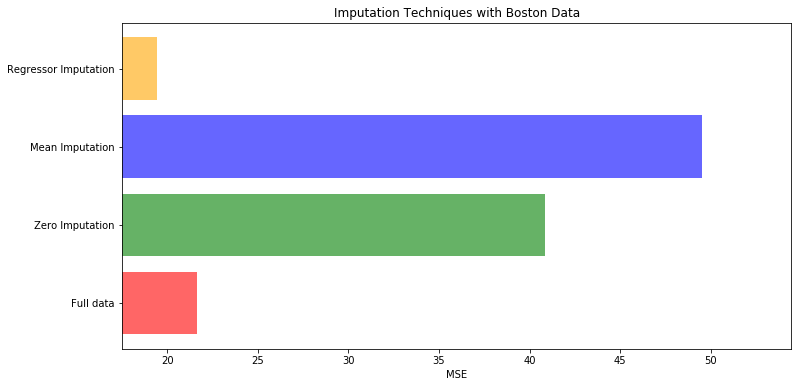

In [55]:
x_labels = [
    'Full data'
    ,'Zero Imputation'
    ,'Mean Imputation'
    ,'Regressor Imputation'
]
colors = ['r','g','b','orange']

plt.figure(figsize=(12,6))
ax = plt.subplot(111)
for i in np.arange(len(mse)):
    ax.barh(i,mse[i],color=colors[i],alpha=0.6,align='center')
ax.set_title("Imputation Techniques with Boston Data")
ax.set_xlim(left=np.min(mse) * 0.9
           ,right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.savefig('compare_imputation',dpi=300)
plt.show()

### 5 实例：随机森林在乳腺癌数据上的调参

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_breast_cancer()

In [3]:
data.data.shape

(569, 30)

In [4]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()

score_pre

0.9648809523809524

0.9631265664160402 71


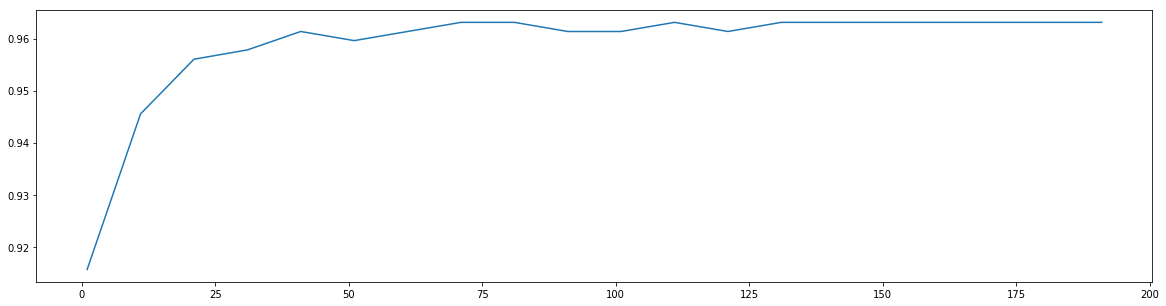

In [63]:
score1 = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1
                                 ,n_jobs = -1
                                 ,random_state = 90
                                )
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score1.append(score)
# 获得交叉验证平均值中的最大值及其下标
# 因为是10个为单位取平均，所以下标要乘以10
print(max(score1),(score1.index(max(score1))*10)+1) 
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),score1)
plt.savefig('nestimators_roc',dpi=300)
plt.show()

0.9666353383458647 72


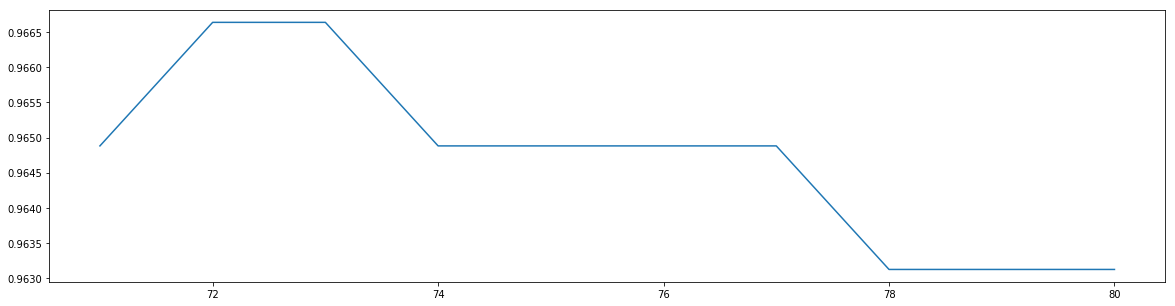

In [68]:
score2 = []
for i in range(71,81):
    rfc = RandomForestClassifier(n_estimators=i+1
                                 ,n_jobs = -1
                                 ,random_state = 90
                                )
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    score2.append(score)
# 获得交叉验证平均值中的最大值及其下标
# 因为是10个为单位取平均，所以下标要乘以10
print(max(score2),([*range(71,81)][score2.index(max(score2))])) 
plt.figure(figsize=[20,5])
plt.plot(range(71,81),score2)
plt.savefig('nestimators_roc2',dpi=300)
plt.show()

In [5]:
# 调整max_depth
param_grid = {'max_depth':np.arange(1,20,1)}
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够 
#   更应该画出学习曲线，来观察深度对模型的影响
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state = 90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_
GS.best_score_

0.9631265664160402

In [6]:
GS.best_params_

{'max_depth': 6}

In [9]:
param_grid={"max_features":np.arange(5,30,1)}
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_params_

{'max_features': 6}

In [10]:
GS.best_score_

0.968421052631579

In [11]:
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)}
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GS.best_score_

0.9613721804511279

In [12]:
GS.best_params_

{'min_samples_leaf': 4}

In [13]:
param_grid = {'min_samples_split':np.arange(2,2+20,1)}
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_split': 3}

In [14]:
GS.best_score_

0.9613721804511279

In [15]:
param_grid = {'criterion':['gini','entropy']}
rfc = RandomForestClassifier(n_estimators=39
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'criterion': 'entropy'}

In [16]:
GS.best_score_

0.9649122807017543